<a href="https://colab.research.google.com/github/StardustMath/Oscar.jl/blob/master/Digdata_NHS_python_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







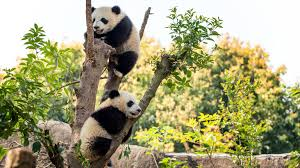


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [3]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 2.68 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [4]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [5]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [38]:
# Calculate the top 10 prescribed anti-depressants
pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10).reset_index()

,BNF_CHEMICAL_SUBSTANCE,ITEMS
0,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
2,Citalopram hydrobromide,52891620
3,Mirtazapine,46335570
4,Fluoxetine hydrochloride,28211759
5,Venlafaxine,21447209
6,Duloxetine hydrochloride,14262656
7,Escitalopram,6580386
8,Paroxetine hydrochloride,4886615
9,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [111]:
# Calculate the monthly national cost of Mirtazapine prescribing
pca_regional_drug_summary_df[
    pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Mirtazapine"
].groupby("YEAR_MONTH")["COST"].sum().reset_index()

,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [110]:
# Calculate the annual spend of Sertraline hydrochloride prescribing in the Midlands region
pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") &
    (pca_regional_drug_summary_df["REGION_NAME"] == "MIDLANDS")
].groupby("YEAR")["COST"].sum().reset_index()


,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

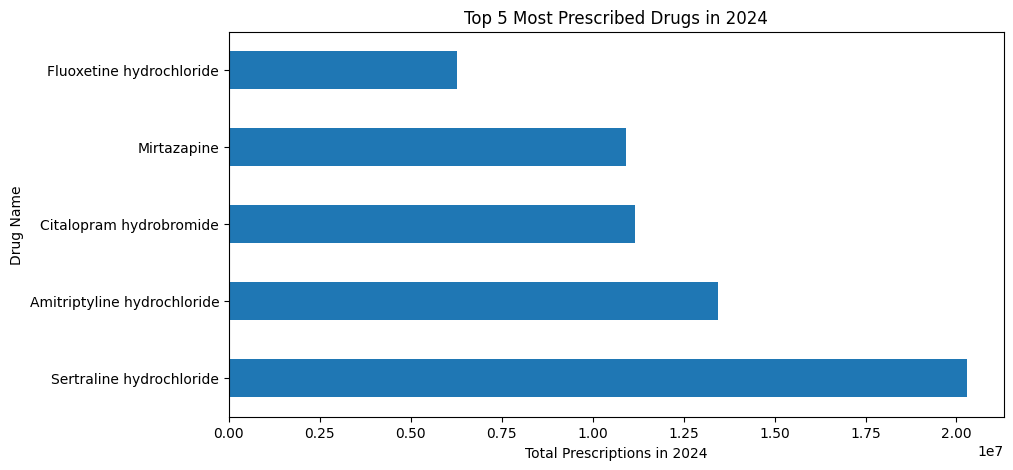

In [109]:
# Filter data for 2024 and get the top 5 prescribed drugs
top_5_drugs_2024 = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df["YEAR"] == 2024
].groupby("BNF_CHEMICAL_SUBSTANCE")["ITEMS"].sum().sort_values(ascending = False).head(5)

# Plot the horizontal bar char
top_5_drugs_2024.plot(kind="barh", figsize=(10, 5))

# Customize labels and title
plt.xlabel("Total Prescriptions in 2024")
plt.ylabel("Drug Name")
plt.title("Top 5 Most Prescribed Drugs in 2024")
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


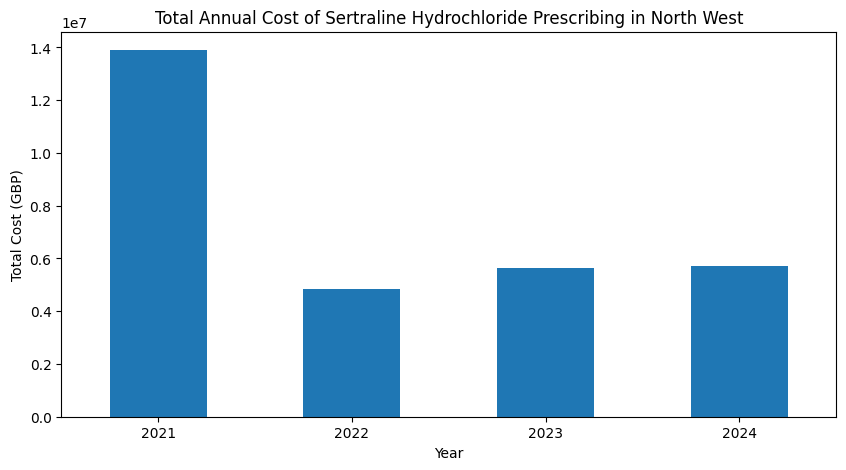

In [116]:
# Filter data for Sertraline hydrochloride in the North West region
sertraline_northwest_annual_cost = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Sertraline hydrochloride") &
    (pca_regional_drug_summary_df["REGION_NAME"] == "NORTH WEST")
].groupby("YEAR")["COST"].sum()

# Plot the vertical bar chart
sertraline_northwest_annual_cost.plot(kind="bar", figsize=(10, 5))

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Total Cost (GBP)")
plt.title("Total Annual Cost of Sertraline Hydrochloride Prescribing in North West")
plt.xticks(rotation=0)
plt.show()







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

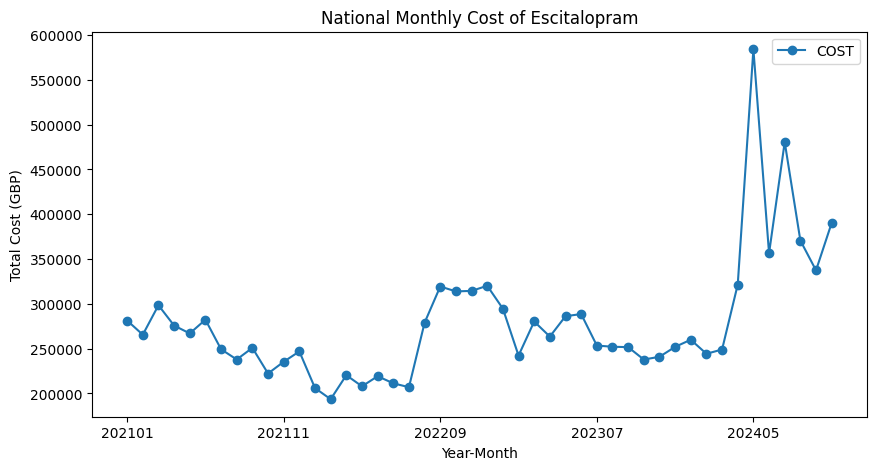

In [118]:
# Filter data for Escitalopram and calculate the monthly national cost
escitalopram_monthly_cost = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"] == "Escitalopram"
].groupby("YEAR_MONTH")["COST"].sum().round(0).reset_index()

# Convert YEAR_MONTH to string for proper x-axis labeling
escitalopram_monthly_cost["YEAR_MONTH"] = escitalopram_monthly_cost["YEAR_MONTH"].astype(str)

# Plot the line chart
escitalopram_monthly_cost.plot(x="YEAR_MONTH", y="COST", kind="line", figsize=(10, 5), marker="o")

# Customize labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Cost (GBP)")
plt.title("National Monthly Cost of Escitalopram")
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

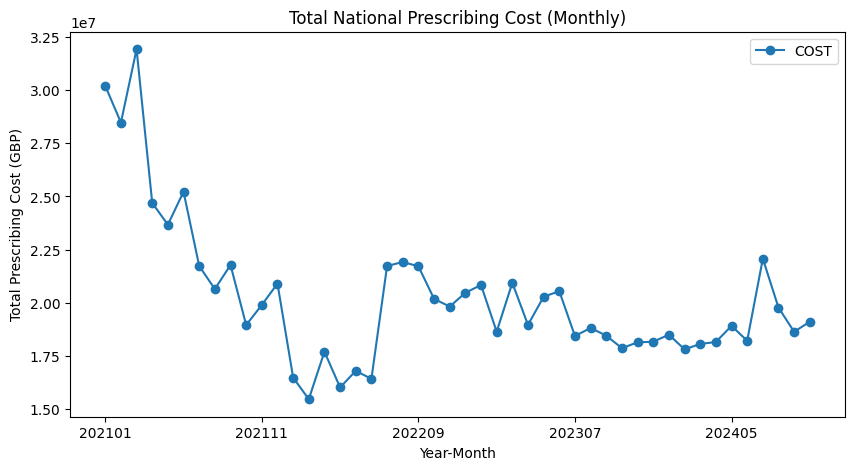

In [120]:
# Aggregate total national prescribing cost per month
monthly_cost = pca_regional_drug_summary_df.groupby("YEAR_MONTH")["COST"].sum().reset_index()

# Convert YEAR_MONTH to string for proper x-axis labeling
monthly_cost["YEAR_MONTH"] = monthly_cost["YEAR_MONTH"].astype(str)

# Plot the line chart
monthly_cost.plot(x="YEAR_MONTH", y="COST", kind="line", figsize=(10, 5), marker="o")

# Customize labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Prescribing Cost (GBP)")
plt.title("Total National Prescribing Cost (Monthly)")
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [162]:
# Calculate national monthly prescribing cost per year
national_monthly_cost = pca_regional_drug_summary_df.groupby(["YEAR", "YEAR_MONTH"])["COST"].sum()

# Calculate summary statistics for the national monthly prescribing cost
national_monthly_stats = national_monthly_cost.groupby("YEAR").describe(percentiles=[0.25, 0.5, 0.75]).reset_index()[["YEAR", "min", "25%", "50%", "75%", "max"]]

# Rename columns for clarity
national_monthly_stats.columns = ["YEAR", "Min", "Q1(25%)", "Median (50%)", "Q3(75%)", "Max"]

# Display the results
print(national_monthly_stats)

   YEAR          Min       Q1(25%)  Median (50%)       Q3(75%)          Max
0  2021  18949756.25  2.083549e+07  2.272424e+07  2.603658e+07  31933609.64
1  2022  15453991.47  1.645837e+07  1.875420e+07  2.077687e+07  21914896.72
2  2023  17859075.18  1.836279e+07  1.872291e+07  2.034416e+07  20934041.83
3  2024  17802904.89  1.816383e+07  1.856003e+07  1.905628e+07  22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

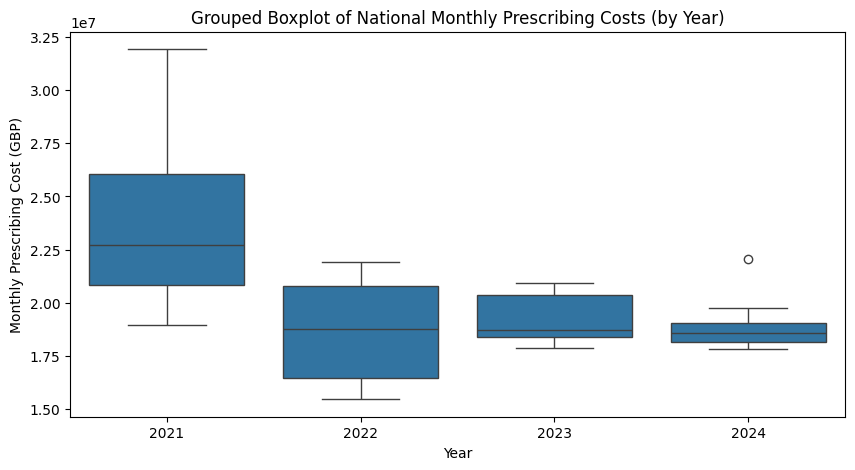

In [167]:
# Create a grouped boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="YEAR", y="COST", data=national_monthly_cost.reset_index())

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Monthly Prescribing Cost (GBP)")
plt.title("Grouped Boxplot of National Monthly Prescribing Costs (by Year)")
plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

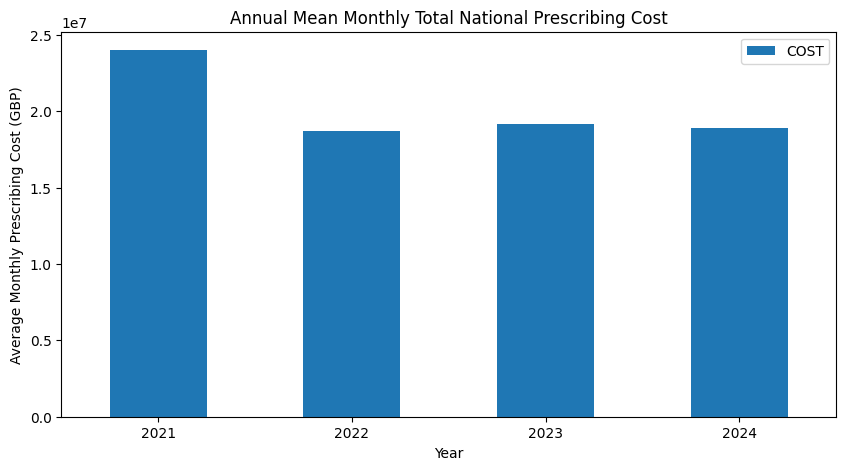

In [170]:
# Calculate the annual mean monthly total national prescribing cost
annual_mean_cost = national_monthly_cost.groupby("YEAR").mean().reset_index()

# Plot the vertical bar chart
annual_mean_cost.plot(x="YEAR", y="COST", kind="bar", figsize=(10, 5))

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Average Monthly Prescribing Cost (GBP)")
plt.title("Annual Mean Monthly Total National Prescribing Cost")
plt.xticks(rotation=0)
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

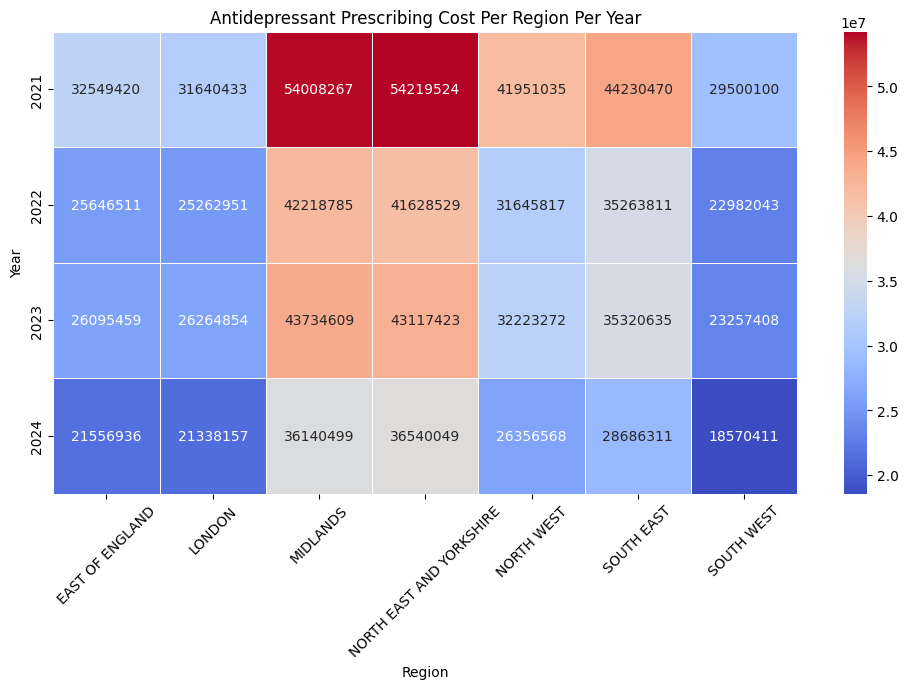

In [188]:
# Create a pivot table for antidepressant prescribing cost per region per year
drug_cost_pivot = pca_regional_drug_summary_df.pivot_table(index="YEAR", columns="REGION_NAME", values="COST", aggfunc="sum")

# Display the pivot table by heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(drug_cost_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

# Customize labels
plt.xlabel("Region")
plt.ylabel("Year")
plt.title("Antidepressant Prescribing Cost Per Region Per Year")
plt.xticks(rotation=45)
plt.show()


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

### 1.1 Total Annual Prescribing Volume (Items)
The bar chart below illustrates the total number of antidepressant items prescribed annually across England.

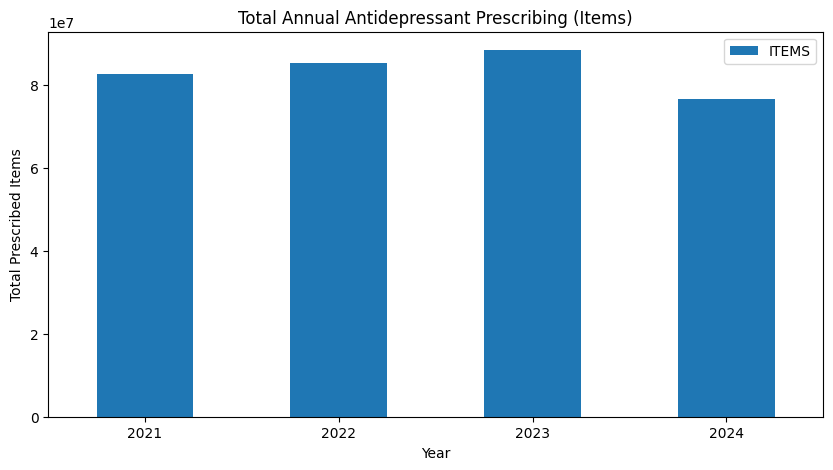

In [192]:
# Calculate total annual antidepressant prescribing volume (items)
annual_drug_items = pca_regional_drug_summary_df.groupby("YEAR")["ITEMS"].sum().reset_index()

# Plot the vertical bar chart for prescribing volume
annual_drug_items.plot(x="YEAR", y="ITEMS", kind="bar", figsize=(10, 5))

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Total Prescribed Items")
plt.title("Total Annual Antidepressant Prescribing (Items)")
plt.xticks(rotation=0)
plt.show()


The chart illustrates the total number of antidepressant items prescribed annually over the four years.
* The first three years increased year by year, showing a steady rise in antidepressant prescribing volume.
* The fourth year fell slightly, indicating a potential shift in prescribing patterns, policy changes, or alternative treatment approaches.

### 1.2 Total Annual Prescribing Cost
The following bar chart visualizes the total annual cost of antidepressant prescribing across England.

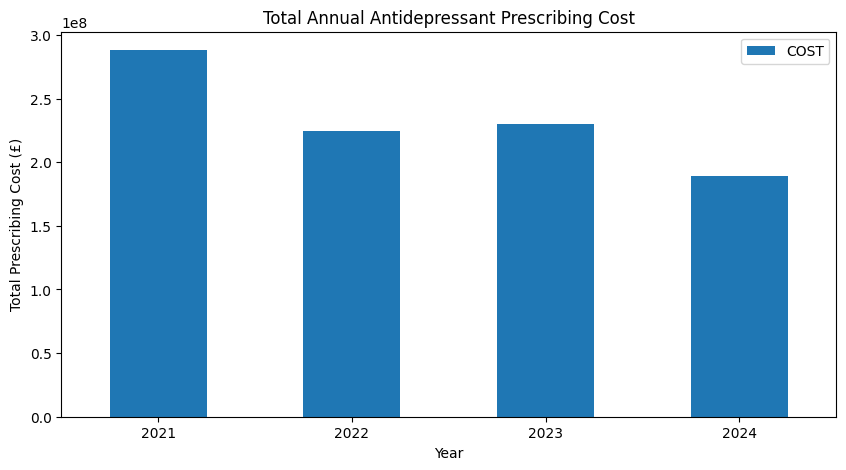

In [194]:
# Calculate total annual antidepressant prescribing cost
annual_drug_cost = pca_regional_drug_summary_df.groupby("YEAR")["COST"].sum().reset_index()

# Plot the vertical bar chart for prescribing cost
annual_drug_cost.plot(x="YEAR", y="COST", kind="bar", figsize=(10, 5))

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Total Prescribing Cost (GBP)")
plt.title("Total Annual Antidepressant Prescribing Cost")
plt.xticks(rotation=0)
plt.show()

The chart above illustrates the total cost of antidepressant prescribing over the four years.
* The total cost has steadily declined over the past four years, suggesting a reduction in overall NHS expenditure on antidepressants.
* In contrast to the trend of rising items, we can conclude that the unit drug price is also gradually decreasing.

### 1.3 Regional Antidepressant Prescribing Volume
The heatmap below displays the total number of antidepressant items prescribed per region per year.

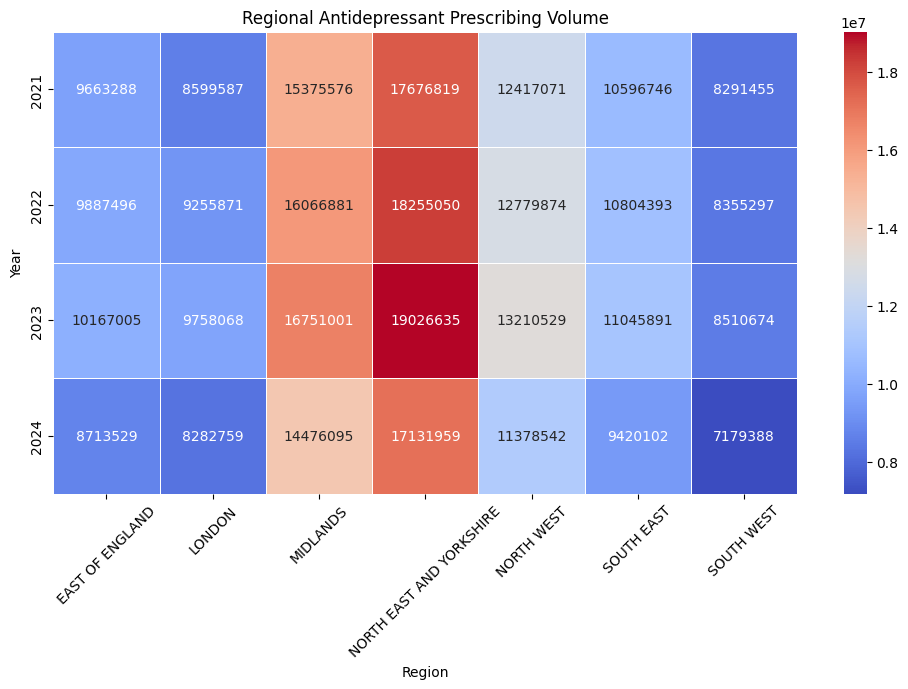

In [200]:
# Create a pivot table for antidepressant prescribing volume per region per year
drug_items_pivot = pca_regional_drug_summary_df.pivot_table(index="YEAR", columns="REGION_NAME", values="ITEMS", aggfunc="sum")

# Display the pivot table by heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(drug_items_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

# Customize labels
plt.xlabel("Region")
plt.ylabel("Year")
plt.title("Regional Antidepressant Prescribing Volume")
plt.xticks(rotation=45)
plt.show()

The table above highlights regional variations in antidepressant prescribing volume over the four years.
* Highest Prescribing Regions: The North East and Yorkshire consistently had the highest number of prescribed items each year.
* Fluctuations in Prescriptions: Some regions, such as London and the South West, show relatively stable prescribing volumes, while others experience noticeable year-to-year changes.
* 2024 Decline: There appears to be a decrease in prescribing volume in 2024 across most regions.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.

